In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
chi_df = pd.read_csv('~/Downloads/chicago_weather.csv')

In [3]:
divvy_df = pd.read_csv('~/Downloads/Divvy_Trips.csv')

In [4]:
rides_weather_df = pd.read_csv('~/Downloads/rides_weather.csv')

In [103]:
pwd

'/Users/ibby/Documents/Divvy-Statical-Analysis'

In [104]:
ride_temp_df = pd.read_pickle('~/Documents/Chicago-ds-120919/mod_3/week_6/day_5/hypothesis_testing/rides_temp_df.pickle')

In [105]:
members_df = pd.read_csv('~/Downloads/rides_temp_mem_df.csv')

In [106]:
members_df = members_df.rename(columns = {'trip_id':'count'})
members_df.head()

,Unnamed: 0,date,user_type,count,temp
0,0,2016-09-01,Customer,1841,68.36825
1,1,2016-09-01,Subscriber,12594,68.36825
2,2,2016-09-02,Customer,4176,68.57525
3,3,2016-09-02,Subscriber,12223,68.57525
4,4,2016-09-03,Customer,10190,68.12825


In [107]:
members_df.groupby('user_type').count()

,Unnamed: 0,date,count,temp
user_type,,,,
Customer,1125,1125,1125,1125
Dependent,24,24,24,24
Subscriber,1125,1125,1125,1125


In [108]:
members_df[members_df['user_type']=='Dependent'];

In [109]:
customer_members_df = members_df[members_df['user_type']=='Customer']

In [110]:
dependent_members_df = members_df[members_df['user_type']=='Dependent']

In [111]:
sub_members_df = members_df[members_df['user_type']=='Subscriber']

In [112]:
ride_temp_df = ride_temp_df.rename(columns = {'trip_id':'counts'})

In [113]:
ride_temp_df['day'] = pd.to_datetime(ride_temp_df['date']).dt.day_name()

In [114]:
ride_temp_df.sample(3)

,date,counts,temp,day
663,2018-06-26,13276,70+,Tuesday
289,2017-06-17,14816,70+,Saturday
553,2018-03-08,5615,20+,Thursday


In [196]:
ride_temp_df.groupby('temp').mean()

,counts
temp,
-0,631.750000
0+,1637.550000
10+,2453.566667
20+,3449.232323
30+,4738.954315
40+,7028.937143
50+,10401.927928
60+,14873.734884
70+,17297.755365


In [197]:
ride_temp_df.temp.value_counts()

70+    233
60+    215
30+    197
40+    175
50+    111
20+     99
80+     41
10+     30
0+      20
-0       4
Name: temp, dtype: int64

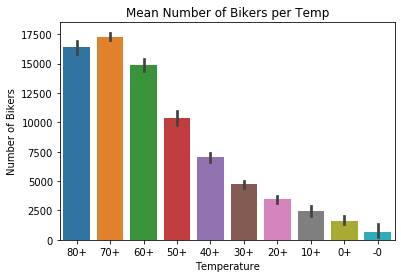

In [195]:
ride_temp_df.groupby('temp').mean()
ride_temp_df.sort_values('temp')
sns.barplot(x = ride_temp_df['temp'],y = ride_temp_df['counts'], data = ride_temp_df.sort_values('temp', ascending=False))
plt.xlabel('Temperature');
plt.ylabel('Number of Bikers');
plt.title('Mean Number of Bikers per Temp');

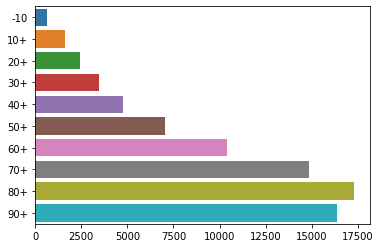

In [116]:
sns.barplot(x = sample_means_list, y =temp_mean_list, orient = 'V')

In [117]:
ride_temp_df['date'] = pd.to_datetime(ride_temp_df['date'])

In [118]:
ride_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 0 to 1124
Data columns (total 4 columns):
date      1125 non-null datetime64[ns]
counts    1125 non-null int64
temp      1125 non-null object
day       1125 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 83.9+ KB


In [119]:
left_bound = 736115
right_bound = 737424

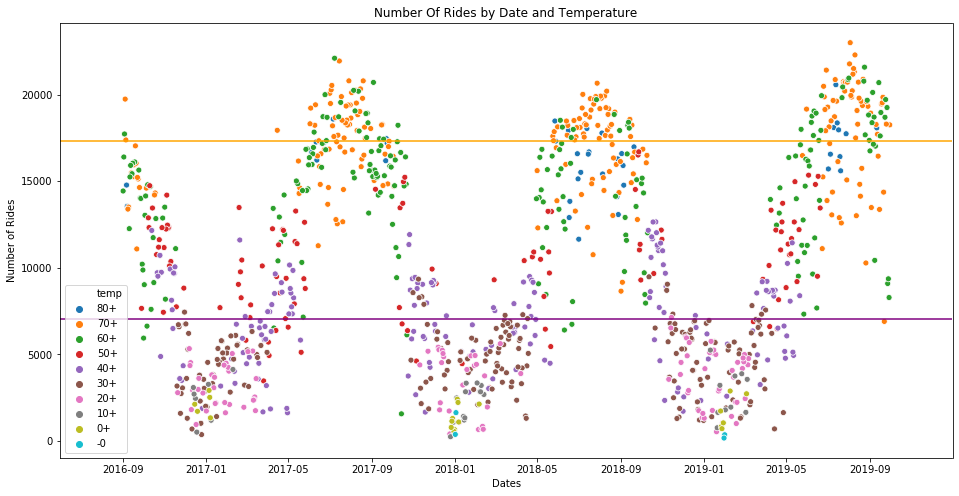

In [187]:
plt.figure(figsize=(16,8))
sns.scatterplot('date','counts',data=ride_temp_df, hue='temp');
plt.hlines([17297,7028],736115,737424,colors=['orange', 'purple']);
# sns.boxplot('temp', 'counts', data=ride_temp_df);
plt.xlim(left_bound,right_bound)
plt.xlabel('Dates');
plt.ylabel('Number of Rides');
plt.title('Number Of Rides by Date and Temperature');

In [121]:
# take count means from differnet temps and do a t test or anova 

In [122]:
ride_temp_df.head()

,date,counts,temp,day
0,2016-09-01,14435,60+,Thursday
1,2016-09-02,16399,60+,Friday
2,2016-09-03,17729,60+,Saturday
3,2016-09-04,19744,70+,Sunday
4,2016-09-05,17386,70+,Monday


In [123]:
sample_means = ride_temp_df['counts'].groupby(ride_temp_df['temp']).mean()

In [124]:
ride_temp_df = ride_temp_df.sort_values('temp', ascending = False)

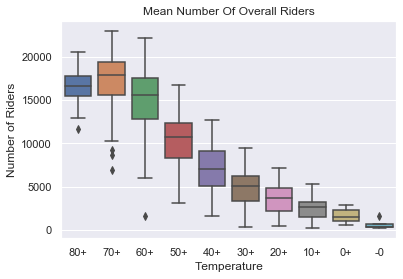

In [237]:
sns.boxplot(ride_temp_df['temp'], ride_temp_df['counts'])
plt.xlabel('Temperature');
plt.ylabel('Number of Riders');
plt.title('Mean Number Of Overall Riders');

In [126]:
lr = ols('count~temp',data = members_df).fit()

In [127]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     1120.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):          4.88e-200
Time:                        17:47:42   Log-Likelihood:                -21981.
No. Observations:                2274   AIC:                         4.397e+04
Df Residuals:                    2272   BIC:                         4.398e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2020.1651    228.174     -8.854      0.000   -2467.616   -1572.714
temp         136.6001      4.081     33.472      0.000     128.597     144.603
==============================================================================
Omnibus:                      310.819   Durbin-Watson:                   3.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.175
Skew:                           0.322   Prob(JB):                     4.38e-25
Kurtosis:                       2.123   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
ride_temp_df.dtypes

date      datetime64[ns]
counts             int64
temp              object
day               object
dtype: object

In [129]:
hypo3_anova_table = sm.stats.anova_lm(lr)

In [130]:
hypo3_anova_table

,df,sum_sq,mean_sq,F,PR(>F)
temp,1.0,1.634362e+10,1.634362e+10,1120.394364,4.881290e-200
Residual,2272.0,3.314253e+10,1.458738e+07,NaN,NaN


In [131]:
sub_lr = ols('count~temp', data = sub_members_df).fit()

In [132]:
sub_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2178.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):          3.25e-265
Time:                        17:47:43   Log-Likelihood:                -10427.
No. Observations:                1125   AIC:                         2.086e+04
Df Residuals:                    1123   BIC:                         2.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1377.2588    217.723     -6.326      0.000   -1804.448    -950.070
temp         181.5567      3.890     46.673      0.000     173.924     189.189
==============================================================================
Omnibus:                       52.743   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.553
Skew:                          -0.292   Prob(JB):                     5.18e-08
Kurtosis:                       2.388   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
sub_lr_table = sm.stats.anova_lm(sub_lr)
sub_lr_table

,df,sum_sq,mean_sq,F,PR(>F)
temp,1.0,1.434554e+10,1.434554e+10,2178.325281,3.246985e-265
Residual,1123.0,7.395607e+09,6.585581e+06,NaN,NaN


In [134]:
# dep_lr = ols('count~temp', data = dependent_members_df).fit()
# dep_lr.summary()

In [135]:
# dep_lr_table = sm.stats.anova_lm(dep_lr)
# dep_lr_table

In [136]:
cust_lr = ols('count~temp', data = customer_members_df).fit()
cust_lr_table = sm.stats.anova_lm(cust_lr)

In [137]:
cust_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1083.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):          7.57e-167
Time:                        17:47:44   Log-Likelihood:                -10057.
No. Observations:                1125   AIC:                         2.012e+04
Df Residuals:                    1123   BIC:                         2.013e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2591.3683    156.673    -16.540      0.000   -2898.773   -2283.963
temp          92.1226      2.799     32.910      0.000      86.630      97.615
==============================================================================
Omnibus:                      355.860   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.450
Skew:                           1.617   Prob(JB):                    3.83e-220
Kurtosis:                       6.330   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
cust_lr_table

,df,sum_sq,mean_sq,F,PR(>F)
temp,1.0,3.693384e+09,3.693384e+09,1083.050753,7.566021e-167
Residual,1123.0,3.829618e+09,3.410167e+06,NaN,NaN


In [186]:
# plot the customer and subscriber d
sub_members_df['date'] = pd.to_datetime(sub_members_df['date'])

In [178]:
sub_members_df.head()

,Unnamed: 0,date,user_type,count,temp
1,1,2016-09-01,Subscriber,12594,68.36825
3,3,2016-09-02,Subscriber,12223,68.57525
5,5,2016-09-03,Subscriber,7539,68.12825
7,7,2016-09-04,Subscriber,7084,70.08950
9,9,2016-09-05,Subscriber,7441,77.16875


In [179]:
sub_members_df = pd.merge(sub_members_df, ride_temp_df, on = 'date')

In [180]:
sub_members_df = sub_members_df.sort_values('temp_y', ascending = False)

Text(0.5, 1.0, 'DIVVY Subscribers')

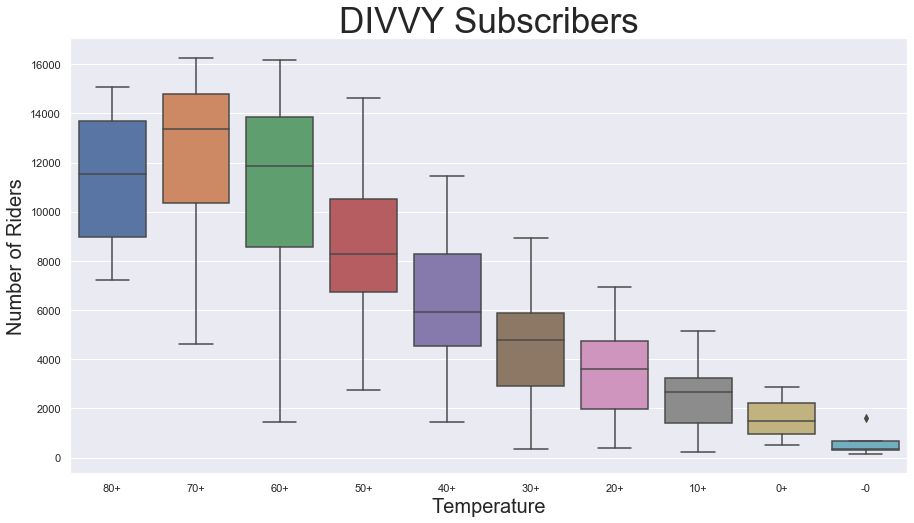

In [238]:
plt.figure(figsize=(15,8))
sns.boxplot(sub_members_df['temp_y'],sub_members_df['count']);
plt.xlabel("Temperature", fontdict = {'fontsize':20})
plt.ylabel("Number of Riders", fontdict = {'fontsize':20})
plt.title("DIVVY Subscribers", fontdict = {'fontsize':35})


In [239]:
#customer_members_df.sort_values('temp_y' , ascending = False)

In [145]:
#customer_members_df = pd.merge(customer_members_df, ride_temp_df, on = 'date')

In [146]:
customer_members_df.head()

,Unnamed: 0,date,user_type,count,temp
0,0,2016-09-01,Customer,1841,68.36825
2,2,2016-09-02,Customer,4176,68.57525
4,4,2016-09-03,Customer,10190,68.12825
6,6,2016-09-04,Customer,12660,70.08950
8,8,2016-09-05,Customer,9945,77.16875


In [167]:
customer_members_df['date'] = pd.to_datetime(customer_members_df['date'])

In [148]:
ride_temp_df['date'] = pd.to_datetime(ride_temp_df['date'])

In [198]:
ride_temp_df.sort_values('temp')

In [203]:
customer_members_df = customer_members_df.sort_values('temp', ascending = False)

Text(0, 0.5, 'Number of Riders')

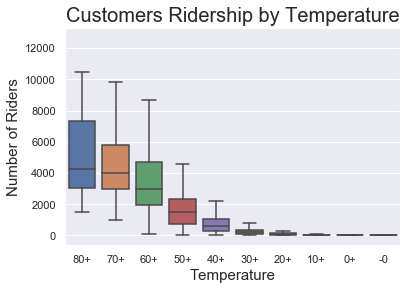

In [236]:
sns.boxplot(x = 'temp',y = 'count',data=customer_members_df,fliersize=0)
plt.title('Customers Ridership by Temperature', fontdict= {'fontsize':20})
plt.xlabel('Temperature',fontdict= {'fontsize':15})
plt.ylabel('Number of Riders',fontdict= {'fontsize':15})

In [183]:
#customer_members_df = pd.merge(customer_members_df, ride_temp_df, on = 'date')

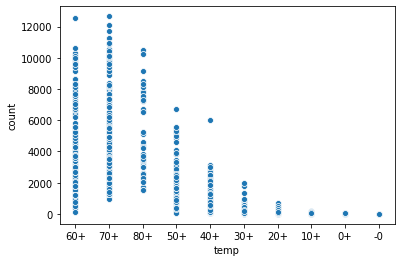

In [184]:
sns.scatterplot(x = customer_members_df['temp'],y=customer_members_df['count'])



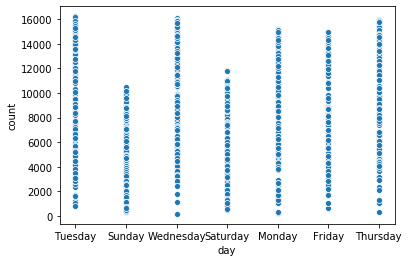

In [185]:
sns.scatterplot(x=sub_members_df['day'], y= sub_members_df['count'])

In [154]:
ride_temp_df.head()

,date,counts,temp,day
733,2018-09-04,15908,80+,Tuesday
633,2018-05-27,18478,80+,Sunday
1105,2019-09-11,18079,80+,Wednesday
703,2018-08-05,15419,80+,Sunday
702,2018-08-04,17783,80+,Saturday


In [155]:
type(sample_means)

pandas.core.series.Series

In [156]:
sample_means.index

Index(['-0', '0+', '10+', '20+', '30+', '40+', '50+', '60+', '70+', '80+'], dtype='object', name='temp')

In [157]:
sample_means_list = [mean for mean in sample_means]
sample_means_list
# for mean in sample_means:
#     print(mean)

[631.75,
 1637.55,
 2453.5666666666666,
 3449.2323232323233,
 4738.954314720812,
 7028.937142857143,
 10401.927927927927,
 14873.73488372093,
 17297.755364806868,
 16387.219512195123]

In [158]:
temp_mean_list = list(sample_means.index)

In [159]:
temp_mean_list

['-0', '0+', '10+', '20+', '30+', '40+', '50+', '60+', '70+', '80+']

In [160]:
#pop_mean = 10372.192889
#sns.boxplot(sample_means.index, sample_mean)

In [161]:
ride_temp_df.head()

,date,counts,temp,day
733,2018-09-04,15908,80+,Tuesday
633,2018-05-27,18478,80+,Sunday
1105,2019-09-11,18079,80+,Wednesday
703,2018-08-05,15419,80+,Sunday
702,2018-08-04,17783,80+,Saturday


In [162]:
chi_df.shape

(83884, 32)

In [163]:
chi_df['weather_main'].unique()

array(['Clouds', 'Snow', 'Clear', 'Rain', 'Mist', 'Drizzle', 'Fog',
       'Haze', 'Thunderstorm', 'Smoke', 'Tornado', 'Dust'], dtype=object)

In [164]:
rides_weather_df.head()

,Unnamed: 0,date,num_rides,bad_weather
0,0,2016-09-01,14435,1.0
1,1,2016-09-02,16399,0.0
2,2,2016-09-03,17729,0.0
3,3,2016-09-04,19744,0.0
4,4,2016-09-05,17386,0.0


In [165]:
divvy_df.shape

(11668717, 18)

In [166]:
ride_temp_df.head()

,date,counts,temp,day
733,2018-09-04,15908,80+,Tuesday
633,2018-05-27,18478,80+,Sunday
1105,2019-09-11,18079,80+,Wednesday
703,2018-08-05,15419,80+,Sunday
702,2018-08-04,17783,80+,Saturday
